# $$\quad \quad \quad \quad  \quad \underline {SD \ 201 \ Project}$$
###### $${COURSERA \: COURSE \: RECOMMENDATION \: SYSTEM: \: CONTENT-BASED \: RECOMMENDATION \: IMPLEMENTATION:} $$ 

<hr>
Group: <br>
Ghada Ben Ammar <br>
Hajer Ben Ammar <br>
Mayssa Haddar <br>
Oussama Zaibi <br>

$ \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \underline{ School \: Year:} $ 2022-2023



#LOADING DATA:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
pd.set_option('max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
courses = pd.read_csv("/content/drive/MyDrive/datasets/Coursera_courses.csv")
reviews = pd.read_csv("/content/drive/MyDrive/datasets/Coursera_reviews.csv")

In [ ]:
df1 = pd.merge(reviews,courses)
df1.head()

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...


In [ ]:
df1.shape

(1454711, 8)

In [ ]:
df3=pd.read_csv('/content/drive/MyDrive/datasets/Coursera.csv')
df3.rename(columns={'Course URL': 'course_url'}, inplace=True)
df3.drop(['Course Name', 'University'], axis=1,inplace=True)

#MERGING DATASETS:



In [ ]:
df4= df1.merge(df3,left_on='course_url', right_on='course_url').drop_duplicates()
df4.head()

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url,Difficulty Level,Course Rating,Course Description,Skills
0,This course is virtually worthless. I couldn't...,By James R,"Apr 23, 2019",1,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...
1,This course was horrible! The Content was very...,By Sanam P,"Oct 22, 2017",1,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...
2,Terrible lecturer. Maybe he should retire. He ...,By Brendan F,"Jan 29, 2019",1,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...
3,This course was aweful! I feel like I didnt le...,By Eli,"Sep 18, 2017",1,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...
4,I was expecting more from the course. It is ve...,By Sebastian S,"Jan 05, 2020",1,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...


#DATA CLEANING AND FEATURE ENGINEERING:

In [ ]:
df4.info()
#We can see the the reviews column contains some missing values, the next step will be dropping the rows corresponding to these missing values, for that we use dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420493 entries, 0 to 1554137
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   reviews             420441 non-null  object
 1   reviewers           420493 non-null  object
 2   date_reviews        420493 non-null  object
 3   rating              420493 non-null  int64 
 4   course_id           420493 non-null  object
 5   name                420493 non-null  object
 6   institution         420493 non-null  object
 7   course_url          420493 non-null  object
 8   Difficulty Level    420493 non-null  object
 9   Course Rating       420493 non-null  object
 10  Course Description  420493 non-null  object
 11  Skills              420493 non-null  object
dtypes: int64(1), object(11)
memory usage: 41.7+ MB


In [ ]:
df4.dropna(inplace=True)

##FEATURE ENGINEERING:

In [ ]:
#Creating two new features: rating_count that gives information on the number of reviews that a given course got, which can clue us on the general number of people that have done the course
#and rating_mean that calculates the mean review of the course by the reviewers in our dataset (Which differs from course rating that is the overall rating of the course in coursera)
#these two features along with the year extracted from date_reviews will be used in order to generate IMDB style rating of each course.
df_rating_eda = df4.groupby(["course_id"]).aggregate({"rating": ["count","mean"]}).reset_index()
df = pd.merge(df4,df_rating_eda, on="course_id")
df.columns=[ "_".join(col)  if type(col)==tuple else col for col in df.columns]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url,Difficulty Level,Course Rating,Course Description,Skills,rating_count,rating_mean
0,This course is virtually worthless. I couldn't...,By James R,"Apr 23, 2019",1,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...,3108,4.811454
1,This course was horrible! The Content was very...,By Sanam P,"Oct 22, 2017",1,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...,3108,4.811454
2,Terrible lecturer. Maybe he should retire. He ...,By Brendan F,"Jan 29, 2019",1,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...,3108,4.811454
3,This course was aweful! I feel like I didnt le...,By Eli,"Sep 18, 2017",1,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...,3108,4.811454
4,I was expecting more from the course. It is ve...,By Sebastian S,"Jan 05, 2020",1,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...,3108,4.811454


In [ ]:
import datetime as dt
df['date_reviews'] = pd.to_datetime(df['date_reviews'], errors='coerce')
df['year'] = df["date_reviews"].dt.year
df['month'] = df["date_reviews"].dt.month
df["day"] = df["date_reviews"].dt.day
df.drop(["date_reviews"], axis=1, inplace=True)
#extracting year, month and day from the date_reviews column

In [ ]:
scale_mapper = {"Conversant":1, "Beginner":2, "Intermediate":3, "Advanced":4}
df["Difficulty Level"] = df["Difficulty Level"].map(scale_mapper)

##**<h3>REVIEWS SENTIMENT ANALYSIS : THE COMPOUND FEATURE: </h3>**



RESOURCE : https://www.kaggle.com/code/jonathanoheix/sentiment-analysis-with-hotel-reviews

We are going to extract the overall sentiment in each review in our dataset, so we could tell not only whether a review is positive or negative, or something in between (neutral) but also the level of negativity/positivity in said comment. This will be obtained by the Compound Feature that ranges from -1 to 1, -1 being the maximum negative value and 1 being the maximum positive value.
This feature will later be used to filter recommended options (we recommend only courses with positive sentiment so mean compound over a certain theshold)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df.insert(3, 'number_words', df["reviews"].map(lambda a: len(a.split())))

In [ ]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
def clean_text(txt):
    txt = txt.lower()     #lower text
    txt = [word.strip(string.punctuation) for word in txt.split(" ")]     #remove puncutation
    txt = [word for word in txt if not any(c.isdigit() for c in word)]    # remove words with numbers in them
    stop = stopwords.words('english')   #remove stop words
    txt = [x for x in txt if x not in stop]
    txt = [t for t in txt if len(t) > 0] # remove empty tokens
    pos_tags = pos_tag(txt)
    txt = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    txt = [t for t in txt if len(t) > 1]  #remove words with only one letter
    txt = " ".join(txt) #final text
    return(txt)

In [ ]:
df["reviews_clean"] = df["reviews"].apply(lambda x: clean_text(x))

In [ ]:
# add sentiment anaylsis columns
sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["reviews"].apply(lambda x: sid.polarity_scores(x))

In [ ]:
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [ ]:
df_compound = df.groupby(["course_id"]).aggregate({"compound": ["mean"]}).reset_index()

In [ ]:
df = pd.merge(df,df_compound, on="course_id")

In [ ]:
df.to_csv('cleandata.csv')
from google.colab import files
files.download('cleandata.csv')

In [ ]:
#final result to cut the running time
#df = pd.read_csv("/content/drive/MyDrive/SD/cleandata (2).csv")  
df = pd.read_csv("/content/drive/MyDrive/datasets/clean_data.csv")  
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df = df.rename(columns={"('compound', 'mean')": 'Mean_compound'})
df.head()

,reviews,reviewers,rating,number_words,course_id,name,institution,course_url,Difficulty Level,Course Rating,Course Description,Skills,rating_count,rating_mean,year,month,day,reviews_clean,neg,neu,pos,compound,Mean_compound
0,This course is virtually worthless. I couldn't...,By James R,1,153,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...,3108,4.811454,2019,4,23,course virtually worthless follow lecture phd ...,0.096,0.875,0.029,-0.8957,0.579917
1,This course was horrible! The Content was very...,By Sanam P,1,37,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...,3108,4.811454,2017,10,22,course horrible content disorient unclear vide...,0.307,0.693,0.000,-0.9144,0.579917
2,Terrible lecturer. Maybe he should retire. He ...,By Brendan F,1,21,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...,3108,4.811454,2019,1,29,terrible lecturer maybe retire can't stay poin...,0.124,0.720,0.156,0.2023,0.579917
3,This course was aweful! I feel like I didnt le...,By Eli,1,48,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...,3108,4.811454,2017,9,18,course aweful feel like didnt learn anything u...,0.139,0.731,0.130,-0.1230,0.579917
4,I was expecting more from the course. It is ve...,By Sebastian S,1,164,financial-markets-global,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...,3108,4.811454,2020,1,5,expect course unstrucuted even miss complete t...,0.043,0.883,0.074,0.6486,0.579917


In [ ]:
df.columns

Index(['reviews', 'reviewers', 'rating', 'number_words', 'course_id', 'name',
       'institution', 'course_url', 'Difficulty Level', 'Course Rating',
       'Course Description', 'Skills', 'rating_count', 'rating_mean', 'year',
       'month', 'day', 'reviews_clean', 'neg', 'neu', 'pos', 'compound',
       'Mean_compound'],
      dtype='object')

#Data Comprehension:

In [ ]:
#Importing dependencies
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
print('Dependencies Imported')

Dependencies Imported


# 1. Plotting the number of reviews 

## 1.1 total number of reviews per month in each year seperately

In [ ]:
#years of reviews
l=sorted(df['year'].unique())
print(l)

[2015, 2016, 2017, 2018, 2019, 2020]


In [ ]:
#2015
df2015 = df[df['year'] == 2015] 
df_new_2015 = df2015.drop_duplicates(subset='course_id', keep="first")
d_new_2015=df_new_2015.groupby('month')['rating_count'].sum()
x1 = d_new_2015.index
y1 = d_new_2015.values

l1=y1.tolist()
k1=x1.tolist()
ll1=[]
kk1=[i for i in range (1,13,1)]
j=0;
for i in range (0,12,1):
    if (kk1[i] in k1)==False:
        ll1.append(0);
    else:
        ll1.append(l1[j]);
        j=j+1;

#2016
df2016 = df[df['year'] == 2016] 
df_new_2016 = df2016.drop_duplicates(subset='course_id', keep="first")
d_new_2016=df_new_2016.groupby('month')['rating_count'].sum()
x2 = d_new_2016.index
y2 = d_new_2016.values

l2=y2.tolist()
k2=x2.tolist()
ll2=[]
kk2=[i for i in range (1,13,1)]
j=0;
for i in range (0,12,1):
    if (kk2[i] in k2)==False:
        ll2.append(0);
    else:
        ll2.append(l2[j]);
        j=j+1;

#2017
df2017 = df[df['year'] == 2017] 
df_new_2017 = df2017.drop_duplicates(subset='course_id', keep="first")
d_new_2017=df_new_2017.groupby('month')['rating_count'].sum()
x3 = d_new_2017.index
y3 = d_new_2017.values

l3=y3.tolist()
k3=x3.tolist()
ll3=[]
kk3=[i for i in range (1,13,1)]
j=0;
for i in range (0,12,1):
    if (kk3[i] in k3)==False:
        ll3.append(0);
    else:
        ll3.append(l3[j]);
        j=j+1;

#2018
df2018 = df[df['year'] == 2018] 
df_new_2018 = df2018.drop_duplicates(subset='course_id', keep="first")
d_new_2018=df_new_2018.groupby('month')['rating_count'].sum()
x4 = d_new_2018.index
y4 = d_new_2018.values

l4=y4.tolist()
k4=x4.tolist()
ll4=[]
kk4=[i for i in range (1,13,1)]
j=0;
for i in range (0,12,1):
    if (kk4[i] in k4)==False:
        ll4.append(0);
    else:
        ll4.append(l4[j]);
        j=j+1;

#2019
df2019 = df[df['year'] == 2019]  
df_new_2019 = df2019.drop_duplicates(subset='course_id', keep="first")
d_new_2019=df_new_2019.groupby('month')['rating_count'].sum()
x5 = d_new_2019.index
y5 = d_new_2019.values

l5=y5.tolist()
k5=x5.tolist()
ll5=[]
kk5=[i for i in range (1,13,1)]
j=0;
for i in range (0,12,1):
    if (kk5[i] in k5)==False:
        ll5.append(0);
    else:
        ll5.append(l5[j]);
        j=j+1;

#2020
df2020 = df[df['year'] == 2020] 
df_new_2020 = df2020.drop_duplicates(subset='course_id', keep="first")
d_new_2020=df_new_2020.groupby('month')['rating_count'].sum()
x6 = d_new_2020.index
y6 = d_new_2020.values

l6=y6.tolist()
k6=x6.tolist()
ll6=[]
kk6=[i for i in range (1,13,1)]
j=0;
for i in range (0,12,1):
    if (kk6[i] in k6)==False:
        ll6.append(0);
    else:
        ll6.append(l6[j]);
        j=j+1;

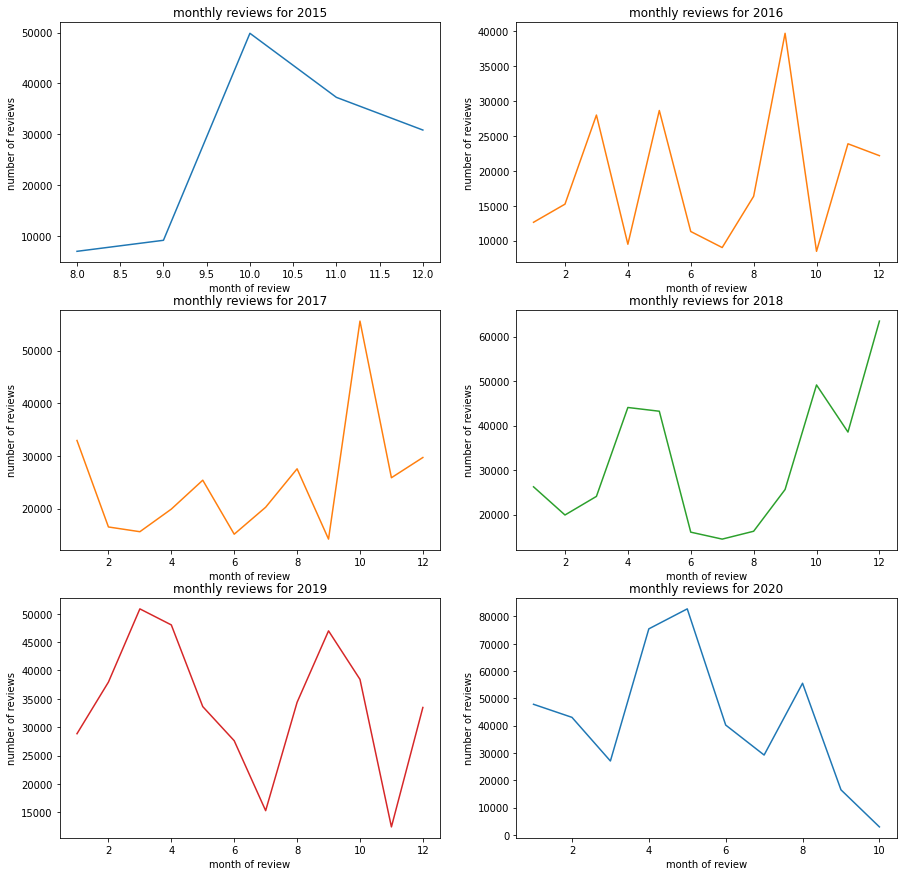

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].plot(x1, y1)
axs[0, 0].set_title('monthly reviews for 2015')

axs[0, 1].plot(x2, y2, 'tab:orange')
axs[0, 1].set_title('monthly reviews for 2016')

axs[1, 0].plot(x3, y3, 'tab:orange')
axs[1, 0].set_title('monthly reviews for 2017')

axs[1, 1].plot(x4, y4, 'tab:green')
axs[1, 1].set_title('monthly reviews for 2018')

axs[2, 0].plot(x5, y5, 'tab:red')
axs[2, 0].set_title('monthly reviews for 2019')

axs[2, 1].plot(x6, y6)
axs[2, 1].set_title('monthly reviews for 2020')

for ax in axs.flat:
    ax.set(xlabel='month of review', ylabel='number of reviews')

## 1.2 total number of reviews in each month for all years together

In [ ]:
y=[]
for i in range (0,12,1):
    s=ll1[i]+ll2[i]+ll3[i]+ll4[i]+ll5[i]+ll6[i]
    y.append(s)
x=[i for i in range (1,13,1)]

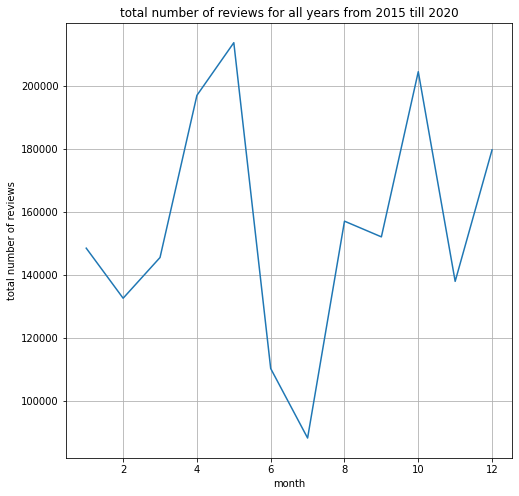

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x, y)
ax.set(xlabel='month', ylabel='total number of reviews',
       title='total number of reviews for all years from 2015 till 2020')
#ax.grid()
plt.grid()
plt.show()

The first thing we examined was the number of reviews per month for each year ( from 2015 till 2020).
And we noted that the "pic" of reviews for each year occurs in April, May, October, and December. These times correspond to the end of each semester, which is test preparation time. Students frequently look for courses that are similar to what they have so that they can revise by using them.


## 1.3 Total number of reviews per year

In [ ]:
total=[]
d_new_2015=df_new_2015.groupby('year')['rating_count'].sum()
a=int(d_new_2015.values)
total.append(a)
d_new_2016=df_new_2016.groupby('year')['rating_count'].sum()
a=int(d_new_2016.values)
total.append(a)
d_new_2017=df_new_2017.groupby('year')['rating_count'].sum()
a=int(d_new_2017.values)
total.append(a)
d_new_2018=df_new_2018.groupby('year')['rating_count'].sum()
a=int(d_new_2018.values)
total.append(a)
d_new_2019=df_new_2019.groupby('year')['rating_count'].sum()
a=int(d_new_2019.values)
total.append(a)
d_new_2020=df_new_2020.groupby('year')['rating_count'].sum()
a=int(d_new_2020.values)
total.append(a)

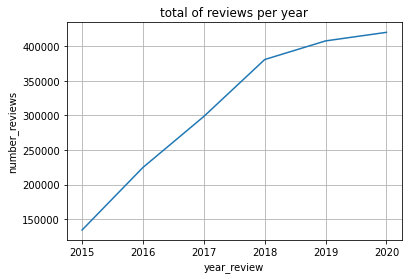

In [ ]:
x=sorted(df['year'].unique())
fig, ax = plt.subplots()
ax.plot(x, total)
ax.set(xlabel='year_review', ylabel='number_reviews',
       title='total of reviews per year')
#ax.grid()
plt.grid()
plt.show()

Following that, we plotted the total number of reviews each year, which led us to the conclusion that the year 2020, which coincides with the Covid pandemic, has the most reviews, implying that the learning rate has increased that year due to the availability of learners.

# 2. Plotting the distribution of courses 

## 2.1 based on difficulty level

In [ ]:
difficulty_levels=df['Difficulty Level'].unique()
difficulty_levels=difficulty_levels.tolist()

df_new= df.drop_duplicates(subset='course_id', keep="first")
number_courses = df_new.groupby("Difficulty Level").size()
number_courses = number_courses.values.tolist()

import plotly.graph_objects as go

labels = difficulty_levels
values = number_courses

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

Most of the courses that coursera offers are "Beginner" and "Advanced" levels which makes the platform beginner friendly and accessible for everyone. 

## 2.2 based on difficulty level and course rating

Text(0.5, 1.0, "\nCoursera's Rating Distribution based on difficulty\n")

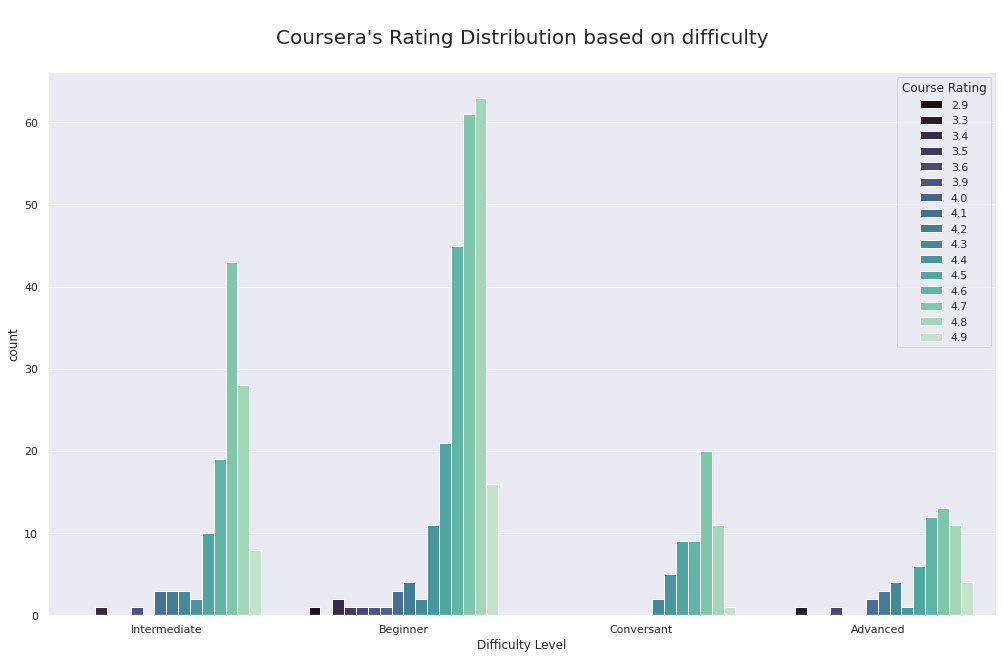

In [ ]:
sns.set(rc={'figure.figsize':(17,10)})
ax = sns.countplot(hue="Course Rating", x="Difficulty Level", data=df_new,palette="mako")
ax.axes.set_title("\nCoursera's Rating Distribution based on difficulty\n",fontsize=20)

Text(0.5, 1.0, "\nReviewers' Rating Distribution based on difficulty\n")

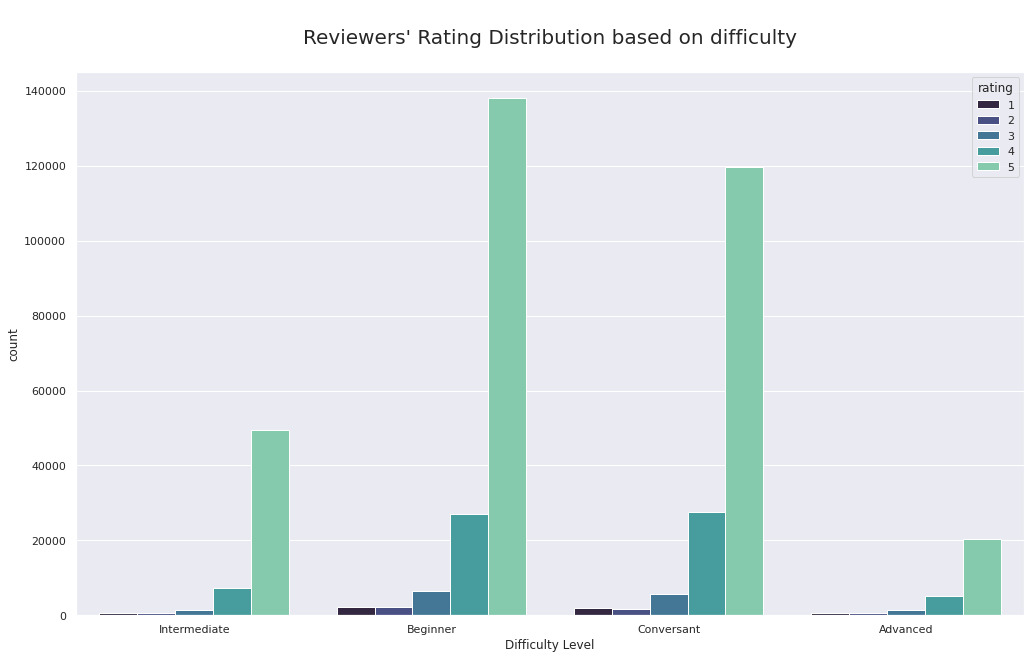

In [ ]:
sns.set(rc={'figure.figsize':(17,10)})
ax = sns.countplot(hue="rating", x="Difficulty Level", data=df,palette="mako")
ax.axes.set_title("\nReviewers' Rating Distribution based on difficulty\n",fontsize=20)

The most top rated courses by Coursera are mainly beginner and
intermediate courses based on the plot (b). However, in the plot (c) we can see
that the conversant courses are much better rated by the reviewers than the
intermediate ones. This result makes us wonder : is there a correlation between
ratings of Coursera and the average rating of reviewers

# 3. Plotting the Correlation between reviewers' ratings and Coursera's global ratings for the best and worst rated courses

## 3.1 Top rated course

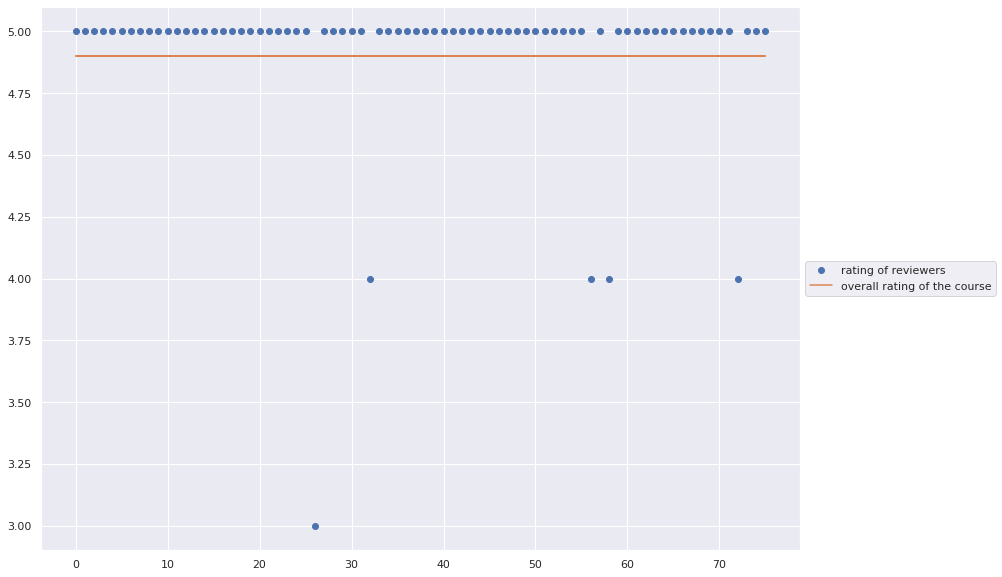

In [ ]:
d_corr = df[df['course_id'] == 'self-determination-theory']  

x= d_corr['reviewers']
y= d_corr['rating']

d_corr['course_url']
X = d_corr['reviewers']

#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x = le.fit_transform(x)

y= d_corr['rating']
y2=d_corr['Course Rating']

plt.plot(x, y, "o", label="rating of reviewers")
plt.plot(x, y2, "-", label="overall rating of the course")
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## 3.2 Worst rated course

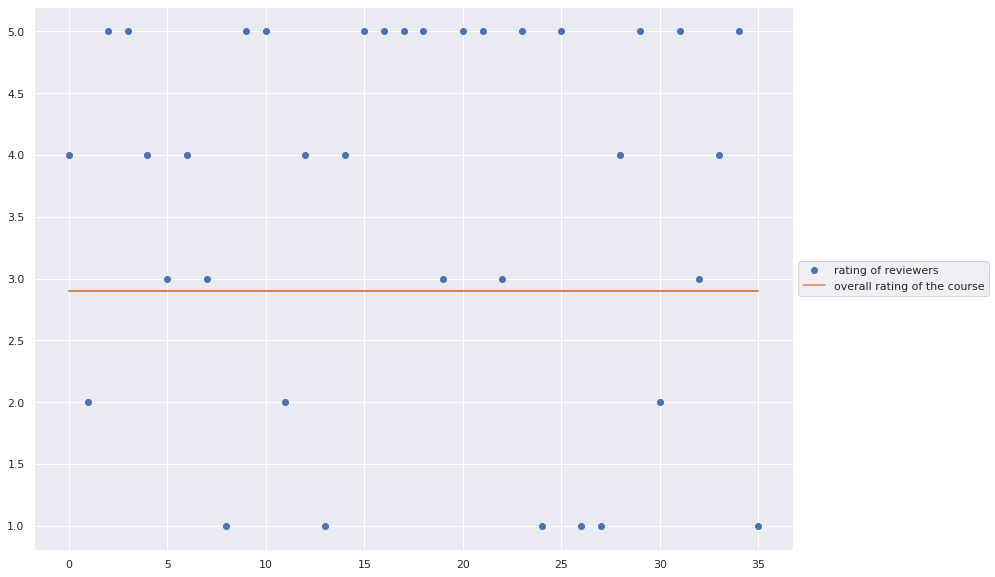

In [ ]:
d_corr1 = df[df['course_id'] == 'japanese-1']   
#label encoding
x= d_corr1['reviewers']
y= d_corr1['rating']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x = le.fit_transform(x)

y= d_corr1['rating']
y2=d_corr1['Course Rating']

plt.plot(x, y, "o", label="rating of reviewers")
plt.plot(x, y2, "-", label="overall rating of the course")
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

We can see that there is a strong correlation between these two features for the best rated course. However, the reviewers' ratings are scattered around the red line which represents the overall rating of the worst rated course.

# 4. Plotting the number of courses for each institution

In [ ]:
list_institutions = df['institution'].unique()
print('number of institutions :', list_institutions.size)

number of institutions : 116


In [ ]:
df_new = df.drop_duplicates(subset='course_id', keep="first")
number_courses_institution = df_new.groupby("institution").size()

In [ ]:
#label encoding for institution names to get a better look of the plot
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
institutions = le.fit_transform(list_institutions)
institutions = institutions.tolist()

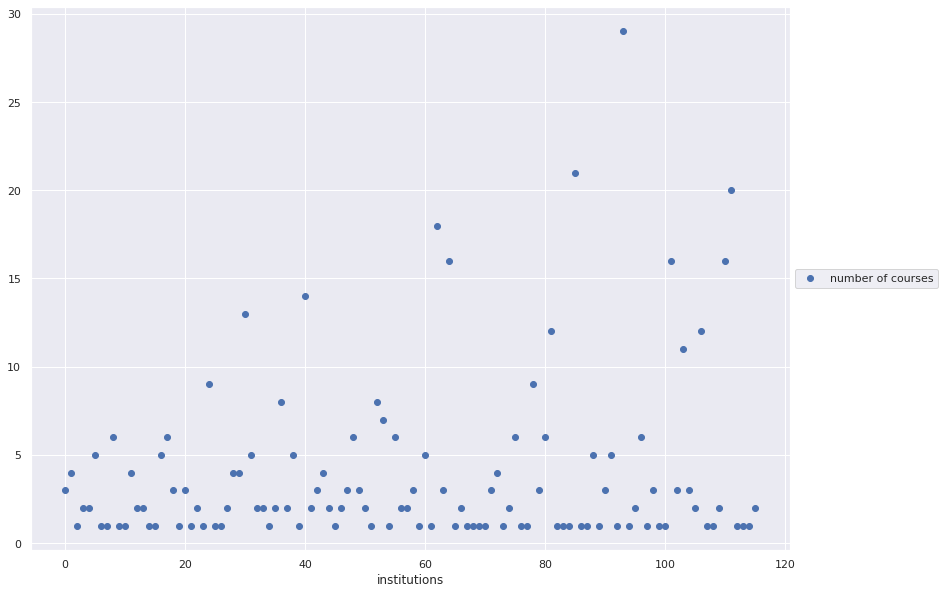

In [ ]:
x=institutions
y=number_courses_institution.values.tolist()
plt.plot(x, y, "o", label="number of courses")
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('institutions')
plt.show()

* Even though coursera has a large number of universities (116), the average number of courses offered by the universities is between 1 and 5 which is a bit surprising. 

Hypothesis: The university with the biggest number of courses is among the top 5 best rated courses.

In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
m=max(y)
a=y.index(m)
institution_max_nb_courses=institutions[a]

def find_key(v): 
    for k, val in le_name_mapping.items(): 
        if v == val: 
            return k 

print('the university that offers the biggest number of courses is : ',find_key(institution_max_nb_courses))

the university that offers the biggest number of courses is :  University of Houston


### top 5 rated universities : 

In [ ]:
df_new = df.drop_duplicates(subset='course_id', keep="first")
df_rating_eda = df_new.groupby(["institution"]).aggregate({"Course Rating": ["mean"]}).reset_index()
d = df_rating_eda.sort_values(by=[('Course Rating', 'mean')],ascending=False)
d.rename(columns={'Course Rating': 'Average rating', 'mean': 'per institution'}, inplace=True)
d.head()

,institution,Average rating
,,per institution
103,University of Rochester,4.9
114,Yonsei University,4.9
24,Facebook,4.9
30,Hebrew University of Jerusalem,4.9
69,The University of Chicago,4.9


### the average rating for the university that offers the largest number of courses :

In [ ]:
d[d['institution']=='University of Houston']

,institution,Average rating
,,per institution
93,University of Houston,4.6


The "University of Houston" is the one that offers the largest number of courses. However, it is not one of the top rated universities. Its average rating is 4.6 which is not bad but lower than the best rating which is 4.9.

# 5. Plotting the top 5 best and worst rated courses

In [ ]:
df_new= df.drop_duplicates(subset='course_id', keep="first")
best = df_new.sort_values(by=['Course Rating'],ascending=False)
best = best.head(5)
worst = df_new.sort_values(by=['Course Rating'],ascending=True)
worst = worst.head(5)
frames = [best,worst]
d_top_worst= pd.concat(frames)

Text(0.5, 1.0, '\nBest and worst rated courses\n\n')

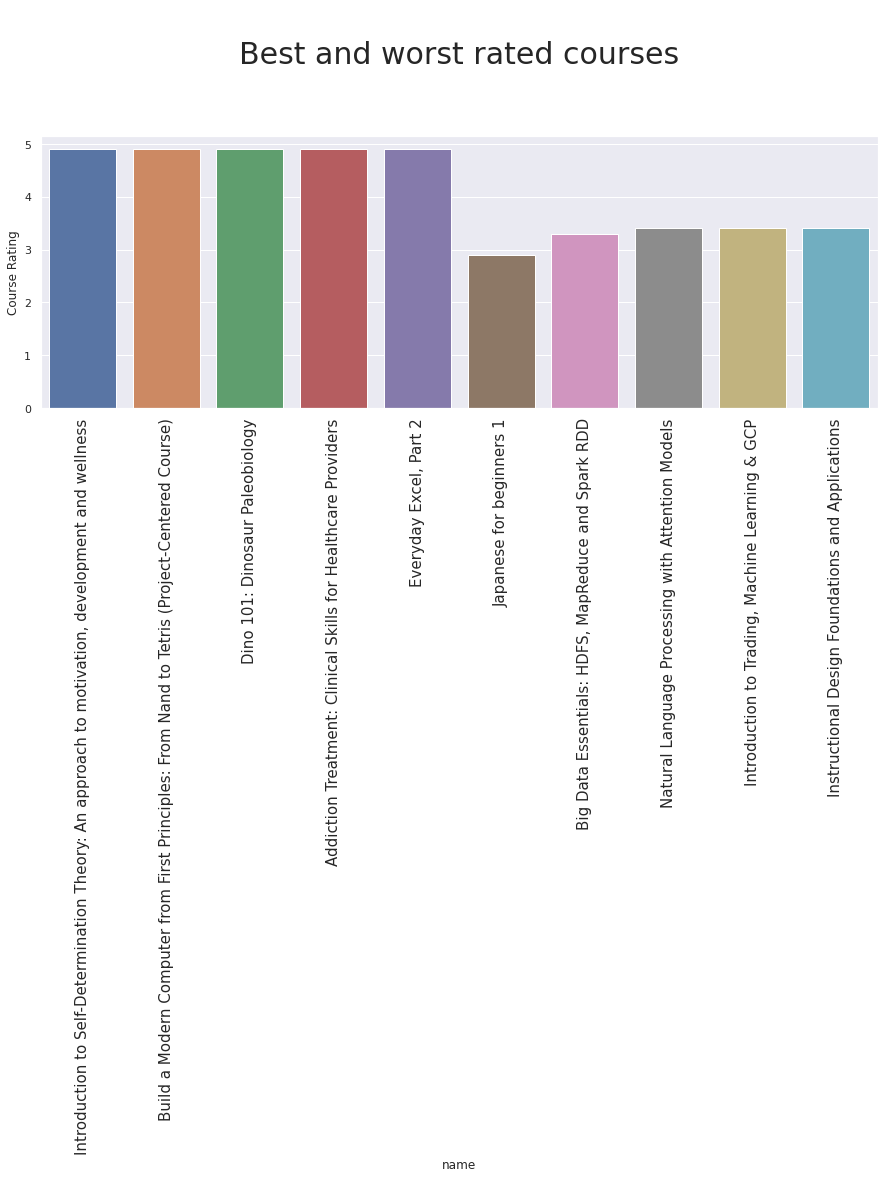

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x='name',y='Course Rating',data=d_top_worst)
p.axes.set_title("\nBest and worst rated courses\n\n",fontsize=30)

Here we notice that even the ratings of the worst courses seem a bit inflated.

#6. Plotting the Correlation between difficulty level , number of reviews w overall rating of the course

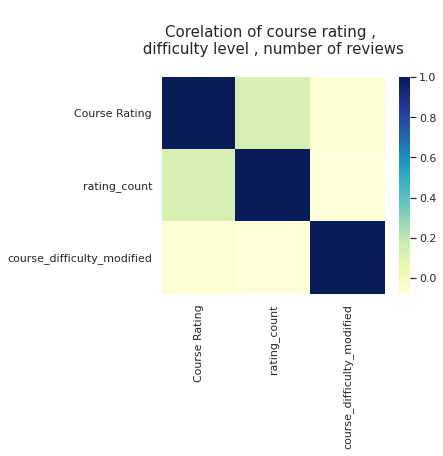

In [ ]:
d = df.drop_duplicates(subset='course_id', keep="first")
d_new = d[['Difficulty Level', 'Course Rating','rating_count']]

def course_difficulty_modifier(x):
    if x=="Beginner":
        return "0"
    elif x=="Intermediate":
        return "1"
    elif x=="Conversant":
        return "0.5"
    elif x=="Advanced":
        return "2"
    else:
        return "0" 
    
d_new['course_difficulty_modified']=d_new['Difficulty Level'].apply(course_difficulty_modifier)
d_new['course_difficulty_modified']=d_new['course_difficulty_modified'].apply(pd.to_numeric)
d_new =d_new.drop(['Difficulty Level'],axis=1)

corrM = d_new.corr()
sns.set(rc={'figure.figsize':(5,4)})
p=sns.heatmap(corrM, 
        xticklabels=corrM.columns,
        yticklabels=corrM.columns,
        cmap="YlGnBu")
p=p.axes.set_title("\nCorelation of course rating , \n difficulty level , number of reviews \n",fontsize=15)

From looking at this heatmap, we can see that there isn't really a strong correlation between the 3 features but there's some correlation between the course rating and the number of reviews.

#IMDB RATING:

We can use the average ratings of the course as the score but using this won't be fair enough since a course with 8.9 average rating and only 3 votes cannot be considered better than the course with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :
<br> $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad $
![picture](https://drive.google.com/uc?export=view&id=1diEFI7GcT0017QDjtKk5MfaNPGknedV_)
<br>
where,

* v is the number of votes for the course (feature rating_count in our case)
* m is the minimum votes required to be listed in the chart
* R is the average rating of the course (feature rating_mean in our case) 
* C is the mean vote across the whole report

In [ ]:
C= df['rating'].mean()
C

4.679322425738689

So, the mean rating for all the courses is approx 4.7 on a scale of 5.
The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 50th percentile as our cutoff. In other words, for a course to feature in the charts, it must have more votes than at least 50% of the courses in the list.

In [ ]:
m= df['rating_count'].quantile(0.5)
m

2225.0

In [ ]:
df.shape

(420433, 16)

In [ ]:
df.columns

Index(['reviews', 'reviewers', 'rating', 'number_words', 'course_id', 'name',
       'institution', 'course_url', 'Difficulty Level', 'Course Rating',
       'Course Description', 'Skills', 'rating_count', 'rating_mean', 'year',
       'month', 'day', 'reviews_clean', 'neg', 'neu', 'pos', 'compound',
       'Mean_compound'],
      dtype='object')

In [ ]:
q_courses = df.copy().loc[df['rating_count'] >= m]
q_courses.shape

(211189, 23)

We see that there are 50992 Courses which qualify to be in this list. Now, we need to calculate our metric for each qualified course. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified courses:

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['rating_count']
    R = x['Course Rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_courses['weighted_score'] = q_courses.apply(weighted_rating, axis=1)

In [ ]:
q_courses.weighted_score.value_counts()

4.784614    15226
4.866175    12291
4.781196    12054
4.780952    11871
4.780323    11421
4.774241     8199
4.618344     7396
4.772057     7384
4.848859     7376
4.694717     6484
4.841470     6164
4.548386     6021
4.840252     5993
4.694360     5933
4.418272     4911
4.762235     4885
4.693461     4811
4.693174     4515
4.499471     4023
4.629105     3839
4.692032     3549
4.691568     3231
4.691497     3186
4.749765     3120
4.633094     3108
4.691342     3089
4.748758     3015
4.691128     2961
4.747863     2925
4.521575     2887
4.747362     2876
4.578249     2874
4.690967     2868
4.690872     2815
4.745778     2727
4.581145     2692
4.690628     2684
4.799856     2678
4.636617     2595
4.740490     2287
4.589661     2225
Name: weighted_score, dtype: int64

In [ ]:
q_courses.weighted_score.unique()

array([4.63309439, 4.74875809, 4.78461363, 4.69346111, 4.77205665,
       4.69156752, 4.7478626 , 4.86617473, 4.6183445 , 4.6909665 ,
       4.69149739, 4.8488587 , 4.7809515 , 4.69436043, 4.78032335,
       4.84025218, 4.63661668, 4.5215752 , 4.84147007, 4.6911285 ,
       4.69087151, 4.57824915, 4.41827248, 4.69134219, 4.76223522,
       4.54838617, 4.69471723, 4.62910495, 4.74049034, 4.58966121,
       4.74736177, 4.49947061, 4.69203194, 4.69317395, 4.69062791,
       4.74976471, 4.79985568, 4.74577795, 4.58114549, 4.7742414 ,
       4.78119563])

#Silhouette Analysis:
ressources: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
cols = ["year", "neg", "neu", "pos", "day", "month", "name", "reviews", "reviewers", "course_id", "institution", "course_url", "Course Description", "Skills", "reviews_clean"]
q_courses = q_courses.drop(cols, axis=1).drop_duplicates()

In [ ]:
scale_mapper = {"Conversant":1, "Beginner":2, "Intermediate":3, "Advanced":4}
q_courses["Difficulty Level"] = q_courses["Difficulty Level"].map(scale_mapper)

In [ ]:
q_courses.head()

,rating,number_words,Difficulty Level,Course Rating,rating_count,rating_mean,compound,Mean_compound,weighted_score
0,1,153,3,4.6,3108,4.811454,-0.8957,0.579917,4.633094
1,1,37,3,4.6,3108,4.811454,-0.9144,0.579917,4.633094
2,1,21,3,4.6,3108,4.811454,0.2023,0.579917,4.633094
3,1,48,3,4.6,3108,4.811454,-0.1230,0.579917,4.633094
4,1,164,3,4.6,3108,4.811454,0.6486,0.579917,4.633094


In [ ]:
range_n_clusters = [2, 3, 4, 5, 6] #number of cluster to choose between

For n_clusters = 2 The average silhouette_score is : 0.7376906067234017
For n_clusters = 3 The average silhouette_score is : 0.7248117772144719
For n_clusters = 4 The average silhouette_score is : 0.7673316789046288
For n_clusters = 5 The average silhouette_score is : 0.7718363586104254
For n_clusters = 6 The average silhouette_score is : 0.7916591782850908


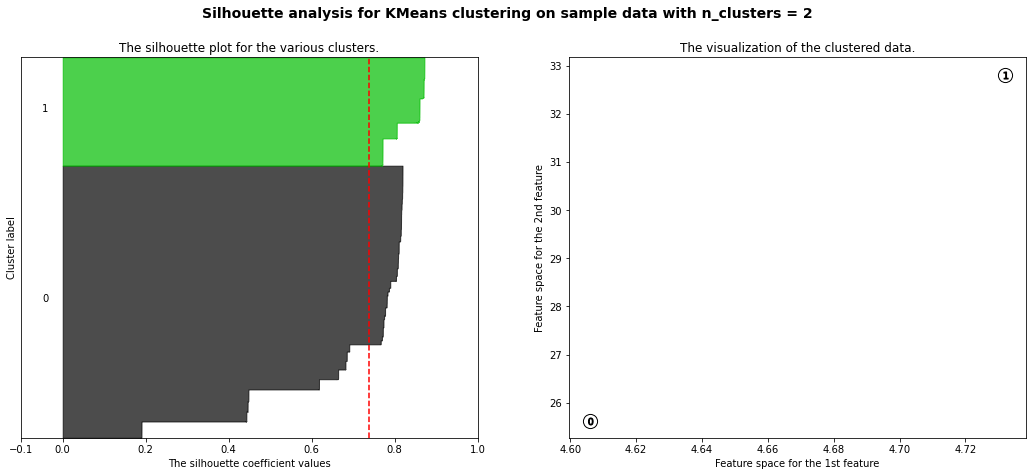

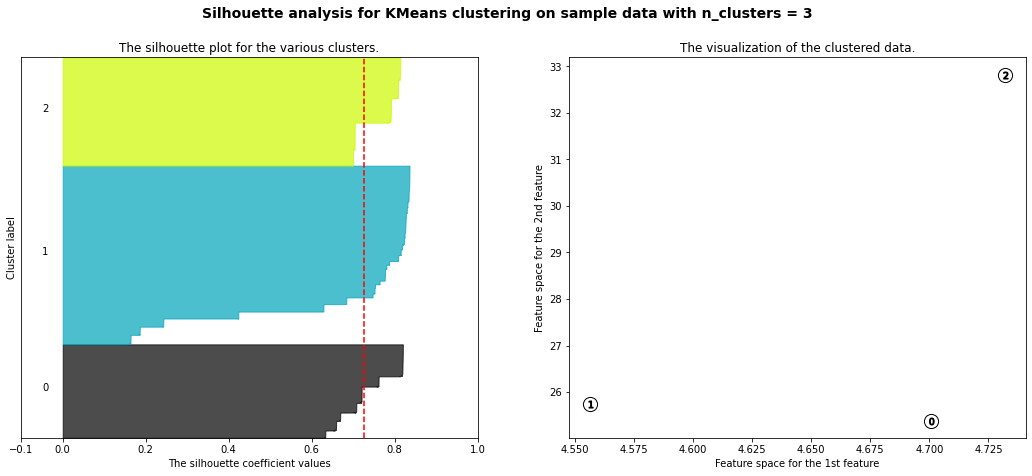

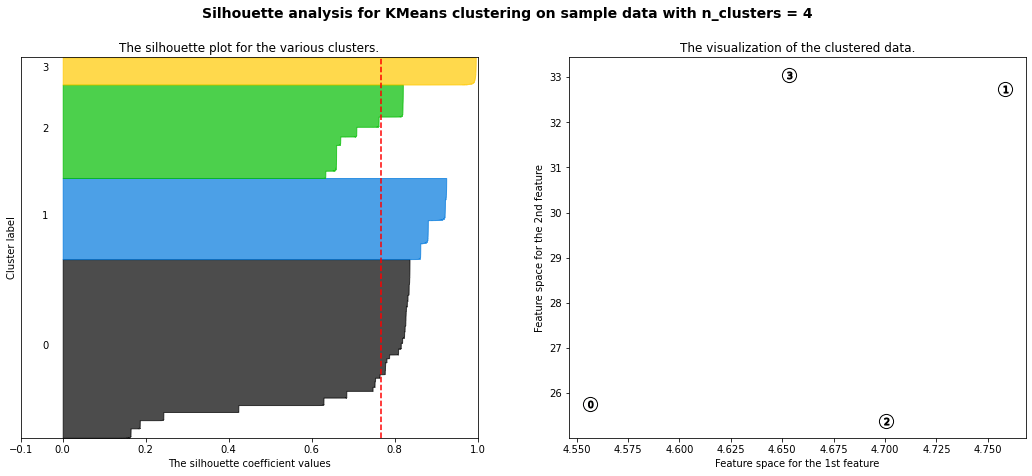

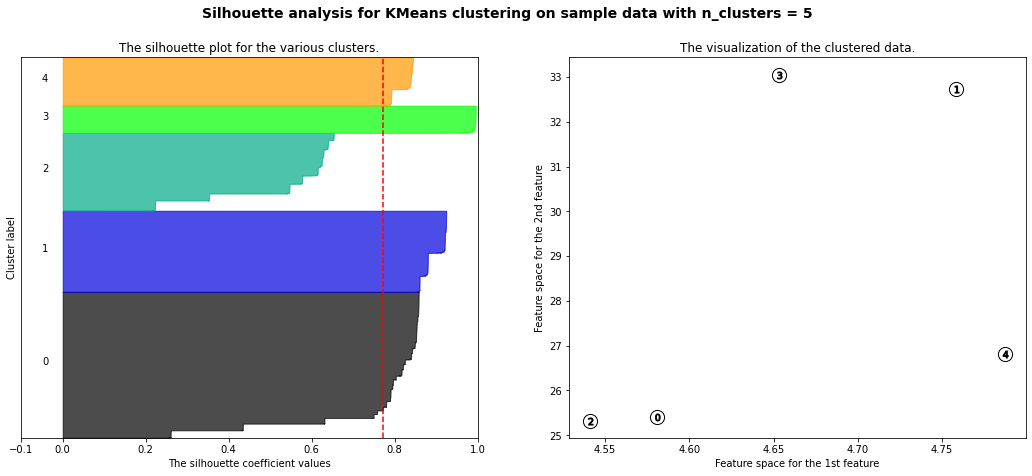

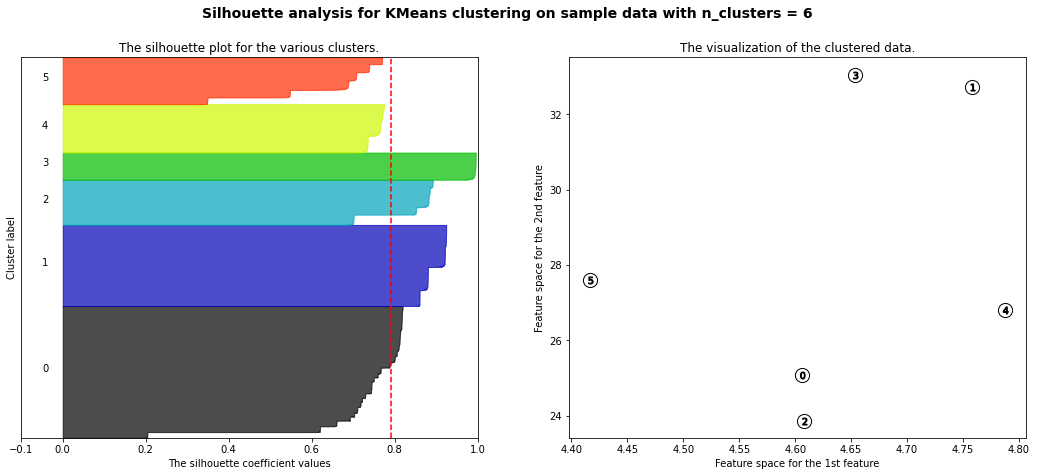

In [ ]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(q_courses) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(q_courses)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(q_courses, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(q_courses, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The best clusters number is 3 so let's get some plotting about the imdb score with some column and see how it is clustered with 3-means.

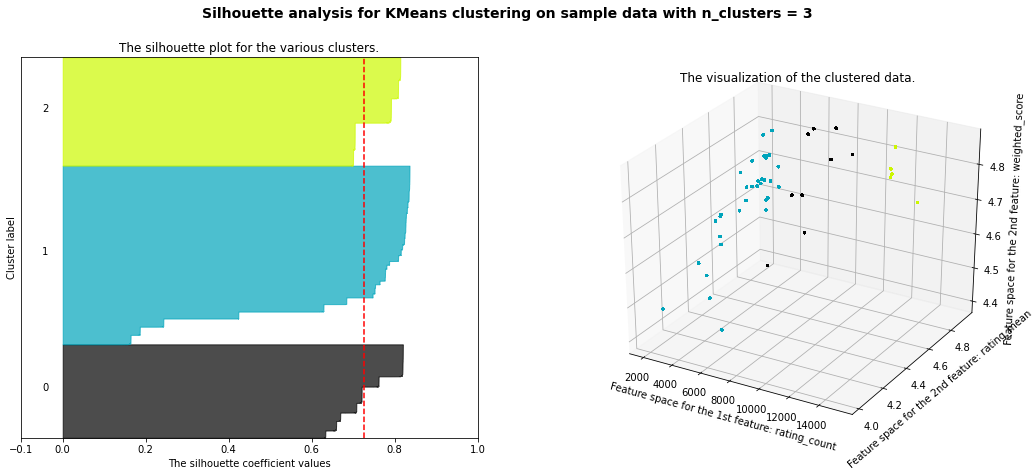

In [ ]:
fig = plt.figure(figsize=(7,7))
ax1 = plt.subplot(1, 2, 1)
fig.set_size_inches(18, 7)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(q_courses) + (n_clusters + 1) * 10])


y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    q_courses["rating_count"], q_courses["rating_mean"], x1["weighted_score"], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature: rating_count")
ax2.set_ylabel("Feature space for the 2nd feature: rating_mean")
ax2.set_zlabel("Feature space for the 2nd feature: weighted_score")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()

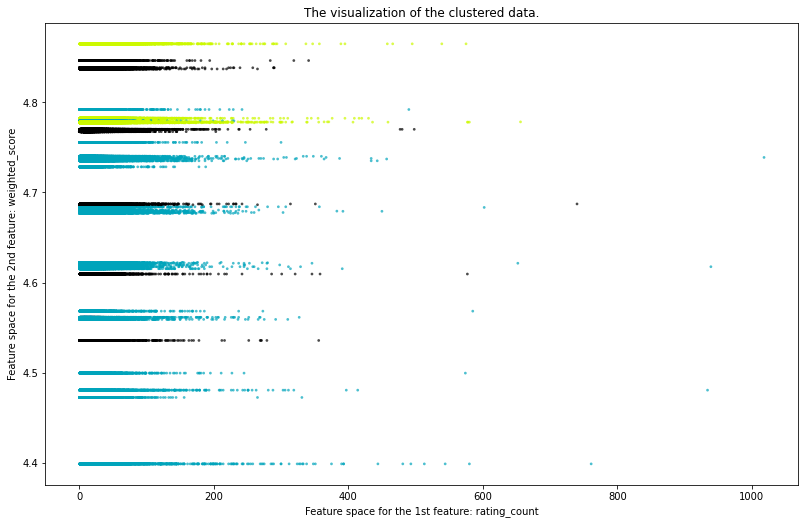

In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(13.5, 8.5)
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax.scatter(
    q_courses["number_words"], q_courses["weighted_score"], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)
ax.set_title("The visualization of the clustered data.")
ax.set_xlabel("Feature space for the 1st feature: rating_count")
ax.set_ylabel("Feature space for the 2nd feature: weighted_score")
plt.show()

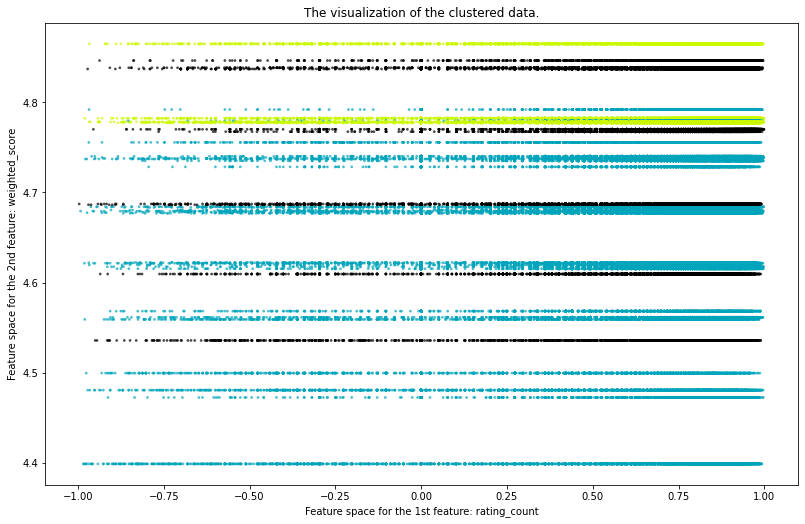

In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(13.5, 8.5)
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax.scatter(
    q_courses["compound"], q_courses["weighted_score"], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)
ax.set_title("The visualization of the clustered data.")
ax.set_xlabel("Feature space for the 1st feature: rating_count")
ax.set_ylabel("Feature space for the 2nd feature: weighted_score")
plt.show()


#Classification based on Shilouette analysis results:


In [ ]:
!pip install catboost -q
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
true_weighted_values = q_courses["weighted_score"] #save them we'll need them after classification
q_courses["weighted_score"] = cluster_labels

In [ ]:
train = q_courses[q_courses.columns[:-1]]
target = q_courses["weighted_score"]
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2,random_state=2022) 

In [ ]:
model = CatBoostClassifier(
    iterations=10, 
    random_seed=2022,
    verbose=True,
    l2_leaf_reg=8,
    depth=3,
    #early_stopping_rounds=True,
    #loss_function='CrossEntropy'
)
model.fit(X_train, y_train,
        eval_set=(X_test, y_test), 
        verbose=True,
)

0:	learn: 1.0395706	test: 1.0395704	best: 1.0395704 (0)	total: 84.2ms	remaining: 758ms
1:	learn: 0.9856038	test: 0.9856038	best: 0.9856038 (1)	total: 117ms	remaining: 470ms
2:	learn: 0.9360409	test: 0.9360409	best: 0.9360409 (2)	total: 155ms	remaining: 361ms
3:	learn: 0.8902907	test: 0.8902909	best: 0.8902909 (3)	total: 188ms	remaining: 281ms
4:	learn: 0.8479053	test: 0.8479055	best: 0.8479055 (4)	total: 221ms	remaining: 221ms
5:	learn: 0.8085103	test: 0.8085105	best: 0.8085105 (5)	total: 254ms	remaining: 169ms
6:	learn: 0.7717626	test: 0.7717628	best: 0.7717628 (6)	total: 298ms	remaining: 128ms
7:	learn: 0.7374119	test: 0.7374121	best: 0.7374121 (7)	total: 333ms	remaining: 83.1ms
8:	learn: 0.7052236	test: 0.7052238	best: 0.7052238 (8)	total: 366ms	remaining: 40.6ms
9:	learn: 0.6749894	test: 0.6749898	best: 0.6749898 (9)	total: 400ms	remaining: 0us

bestTest = 0.6749898402
bestIteration = 9



In [ ]:
model.score(X_train, y_train)
#clearly the model is overfitting and we need to see how to prevent this.

1.0

In [ ]:
df.head()

,rating,number_words,Difficulty Level,Course Rating,rating_count,rating_mean,compound,Mean_compound
0,1,153,3,4.6,3108,4.811454,-0.8957,0.579917
1,1,37,3,4.6,3108,4.811454,-0.9144,0.579917
2,1,21,3,4.6,3108,4.811454,0.2023,0.579917
3,1,48,3,4.6,3108,4.811454,-0.1230,0.579917
4,1,164,3,4.6,3108,4.811454,0.6486,0.579917


In [ ]:
q_courses.head()

,rating,number_words,Difficulty Level,Course Rating,rating_count,rating_mean,compound,Mean_compound,weighted_score
0,1,153,3,4.6,3108,4.811454,-0.8957,0.579917,1
1,1,37,3,4.6,3108,4.811454,-0.9144,0.579917,1
2,1,21,3,4.6,3108,4.811454,0.2023,0.579917,1
3,1,48,3,4.6,3108,4.811454,-0.1230,0.579917,1
4,1,164,3,4.6,3108,4.811454,0.6486,0.579917,1


In [ ]:
q_courses[q_courses.columns[:-1]]

,rating,number_words,Difficulty Level,Course Rating,rating_count,rating_mean,compound,Mean_compound
0,1,153,3.0,4.6,3108,4.811454,-0.8957,0.579917
1,1,37,3.0,4.6,3108,4.811454,-0.9144,0.579917
2,1,21,3.0,4.6,3108,4.811454,0.2023,0.579917
3,1,48,3.0,4.6,3108,4.811454,-0.1230,0.579917
4,1,164,3.0,4.6,3108,4.811454,0.6486,0.579917
...,...,...,...,...,...,...,...,...
420404,5,2,1.0,4.8,12054,4.767546,0.5994,0.581934
420405,5,2,1.0,4.8,12054,4.767546,0.8481,0.581934
420406,5,2,1.0,4.8,12054,4.767546,0.5684,0.581934
420411,5,3,1.0,4.8,12054,4.767546,0.4588,0.581934


In [ ]:
df.head()

,rating,number_words,Difficulty Level,Course Rating,rating_count,rating_mean,compound,Mean_compound
0,1,153,3.0,4.6,3108,4.811454,-0.8957,0.579917
1,1,37,3.0,4.6,3108,4.811454,-0.9144,0.579917
2,1,21,3.0,4.6,3108,4.811454,0.2023,0.579917
3,1,48,3.0,4.6,3108,4.811454,-0.1230,0.579917
4,1,164,3.0,4.6,3108,4.811454,0.6486,0.579917


In [ ]:
q_courses.head()

,rating,number_words,Difficulty Level,Course Rating,rating_count,rating_mean,compound,Mean_compound,weighted_score
0,1,153,3.0,4.6,3108,4.811454,-0.8957,0.579917,1
1,1,37,3.0,4.6,3108,4.811454,-0.9144,0.579917,1
2,1,21,3.0,4.6,3108,4.811454,0.2023,0.579917,1
3,1,48,3.0,4.6,3108,4.811454,-0.1230,0.579917,1
4,1,164,3.0,4.6,3108,4.811454,0.6486,0.579917,1


In [ ]:
to_be_predicted_df = pd.concat([df, q_courses[q_courses.columns[:-1]], q_courses[q_courses.columns[:-1]]]).drop_duplicates(keep=False)
to_be_predicted_df.shape

(171859, 8)

In [ ]:
np.unique(model.predict(data=to_be_predicted_df))
#Model overfitting and solution is to be re-checked.

array([1])

The use of this clustering will help for future supervised predictions the number of classed to search for. 
<br>
We may perform some random forest to detect the rest of imdb classed

#Predict imdb Regression approach:
After feature discovering, we're going to predict imdb score using regression and our pick lends on catboost (we could try a lot of other models).  

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
q_courses["weighted_score"] = true_weighted_values
target = q_courses["weighted_score"]
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2,random_state=2022) 

In [ ]:
model = CatBoostRegressor( random_seed=2022, verbose=200)
model.fit(X_train, y_train, eval_set=(X_test, y_test), 
           use_best_model=True, 
           early_stopping_rounds=300)

Learning rate set to 0.106889
0:	learn: 0.0906248	test: 0.0903967	best: 0.0903967 (0)	total: 14.2ms	remaining: 14.1s
200:	learn: 0.0000007	test: 0.0000007	best: 0.0000007 (200)	total: 2.64s	remaining: 10.5s
400:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (400)	total: 5.23s	remaining: 7.82s
600:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (600)	total: 7.74s	remaining: 5.14s
800:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (752)	total: 10.3s	remaining: 2.55s
999:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (752)	total: 12.8s	remaining: 0us

bestTest = 3.1032961e-15
bestIteration = 752

Shrink model to first 753 iterations.


In [ ]:
preds = model.predict(X_test)
# calculate mean squared error on val sub-set preds
rmse = np.sqrt(mean_squared_error(preds, y_test))
rmse

1.2364635088177347e-07

#Combined Feature and Creating table with only necessary features and without duplicates 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projet sd 2022/cleandata.csv')

In [ ]:
cols = ["name", "Difficulty Level", "Course Description", "Skills"] #list of features used in combined_feature
df["Combined_feature"] = df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1) #creating and adding combined_feature to the dataframe
df.drop(['course_url', 'reviewers', 'reviews','rating','year','month','day','number_words','reviews_clean', 'neg', 'neu', 'pos','compound','Unnamed: 0'],axis=1,inplace=True) #dropping unnecessary features 
df = df.rename(columns={"('compound', 'mean')": 'Mean_compound'})
df.drop_duplicates(inplace=True) #dropping duplicates
df.reset_index(inplace=True)
df.head(3)

,index,course_id,name,institution,Difficulty Level,Course Rating,Course Description,Skills,rating_count,rating_mean,Mean_compound,Combined_feature
0,0,financial-markets-global,Financial Markets,Yale University,Intermediate,4.6,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...,3108,4.811454,0.579917,Financial Markets Intermediate An overview of ...
1,3108,introduction-psychology,Introduction to Psychology,Yale University,Beginner,4.8,What are people most afraid of? What do our dr...,human behavior Critical Thinking happiness ...,3015,4.852736,0.644130,Introduction to Psychology Beginner What are p...
2,6123,python,Programming for Everybody (Getting Started wit...,University of Michigan,Conversant,4.8,This course aims to teach everyone the basics ...,syntax language semantics Computer Programm...,15226,4.583673,0.653339,Programming for Everybody (Getting Started wit...


#MODEL AND CONTENT-BASED RECOMMENDATION SYSTEM:

## 1. Course name with cosine similarity

After having done pre filtering to get the most relevant and highly rated courses in our dataset, based on IMDB score that we generated and based on the general sentiment of reviewers that took the time to write reviews, we are going to recommend new courses from the obtained dataset.

In [ ]:
#The idea is to use the cosine distance between the vectors of the course and the user to determine the likely liking of the course by the user.
#For that we began by creating a new CountVectorizer for Combined_feature : CountVectorizer transforms a text into a vector based on the occurence count of words in the given text.
cv = CountVectorizer() #creating countvectorizer instance
matrix = cv.fit_transform(df["Combined_feature"]) #This will play the role of the course's feature vectors.

#Cosine Similarity:
<br>
Cosine similarity, or the cosine kernel, computes similarity as the normalized dot product of X and Y:

K(X, Y) = <X, Y> / (||X||*||Y||)

Here we are going to take Y=null, and thus create parwise similarity for all elements in matrix.

In [ ]:
cossim = cosine_similarity(matrix) #creating pairwise similarity of all elements of matrix

#Mapping Indexes to Course Titles (name) :

In [ ]:
indexes= pd.Series(df.index, index=df['name']).drop_duplicates()

#GETTING USER PREFERENCE AND RECOMMENDATION :

In [ ]:

#User_preference = "Financial Markets" #input of what course the user liked the most (user looking for similar courses to this course)
#course_index = indexes[User_preference]
#similar_courses = list(enumerate(cossim[course_index])) #accessing the row corresponding to given course to find all the similarity scores for that course


In [ ]:
import operator
def recommend():
    name = input('Enter course name:') #input of what course the user liked the most (user looking for similar courses to this course)
    course_index = indexes[name]
    similar_courses = list(enumerate(cossim[course_index])) #accessing the row corresponding to given course to find all the similarity scores for that course
    Courses_sorted = sorted(similar_courses,key=lambda x:x[1],reverse=True)[1:]
    #Getting best 10 courses similar to the input course : 
    i=0
    print("Top 10 similar courses to "+ name+" are:\n")
    for element in Courses_sorted:
        print(indexes[indexes == element[0]].index[0])
        i=i+1
        if i>10:
            break
    print("recommendation finished ")        

Examples for testing : 

courses names :  
*   Financial Markets
*   Programming for Everybody (Getting Started with Python)
*   Arts and Heritage Management

In [ ]:
recommend()

Enter course name:Financial Markets
Top 10 similar courses to Financial Markets are:

Finance for Non-Finance Professionals
Global Financial Markets and Instruments
Arts and Heritage Management
Financial Engineering and Risk Management Part I
Corporate Sustainability. Understanding and Seizing the Strategic Opportunity
Corporate Finance Essentials
Financing and Investing in Infrastructure
Fundamentals of Immunology: Innate Immunity and B-Cell Function
Understanding Financial Markets
Finance for Non-Financial Managers
Investment Management in an Evolving and Volatile World by HEC Paris and AXA Investment Managers
recommendation finished 


## Keywords based recommendation system : tf-idf with cosine similarity : 

### 1. using difficulty_level in combined_feature 

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from gensim.models.tfidfmodel import TfidfModel
from gensim.similarities import MatrixSimilarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df["combined_feature_clean"] = df["Combined_feature"].apply(lambda x: clean_text(x))
df1 = df[['name', 'combined_feature_clean','Difficulty Level']]
df1.rename(columns = {'combined_feature_clean':'keywords'}, inplace = True) #renaming column "combined_feature_clean" to "keywords"
#we will create a list of lists and each list contains the words of combined_feature_clean
keywords = df1['keywords'].tolist()
keywords = [word_tokenize(keyword) for keyword in keywords]
#We start by creating a dictionary of words using gensim:
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(keywords) # create a dictionary of words from our keywords
#Next, we create a genism corpus, where corpus here just means ‘bag-of-words for each course’:
corpus = [dictionary.doc2bow(doc) for doc in keywords] 
#create corpus where the corpus is a bag of words for each document
#Next, we can convert these bags-of-words into tf-idf models using a genism tf-idf model
tfidf = TfidfModel(corpus) #create tfidf model of the corpus
#Finally, we create an index for our set of course keywords that allows us to compute similarities between any given set of keywords and the keywords of every course in our dataset:
# Create the similarity data structure. This is the most important part where we get the similarities between the courses.
sims = MatrixSimilarity(tfidf[corpus], num_features=len(dictionary))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
def keywords_recommendation(keywords, number_of_hits=10):
    query_doc_bow = dictionary.doc2bow(keywords) # get a bag of words from the query_doc
    query_doc_tfidf = tfidf[query_doc_bow] #convert the regular bag of words model to a tf-idf model where we have tuples
    # of the course ID and it's tf-idf value for the course

    similarity_array = sims[query_doc_tfidf] # get the array of similarity values between our course and every other movie. 
    #So the length is the number of courses we have. To do this, we pass our list of tf-idf tuples to sims.

    similarity_series = pd.Series(similarity_array.tolist(), index=df1.name.values) #Convert to a Series
    top_hits = similarity_series.sort_values(ascending=False)[:number_of_hits] #get the top matching results, 
    # i.e. most similar courses

    # Print the top matching courses
    print("Our top %s most similar courses for the keywords %s are:" %(number_of_hits, keywords))
    for idx, (df2,score) in enumerate(zip(top_hits.index, top_hits)):
        print("%d '%s' with a similarity score of %.3f" %(idx+1, df2, score))

In [ ]:
keywords_recommendation(["programming","python","beginner"])

Our top 10 most similar courses for the keywords ['programming', 'python', 'beginner'] are:
1 'Programming for Everybody (Getting Started with Python)' with a similarity score of 0.403
2 'Python for Data Science and AI' with a similarity score of 0.370
3 'Python Basics' with a similarity score of 0.366
4 'Python Functions, Files, and Dictionaries' with a similarity score of 0.331
5 'Learn to Program: The Fundamentals' with a similarity score of 0.328
6 'Introduction to Data Science in Python' with a similarity score of 0.324
7 'Python Data Structures' with a similarity score of 0.296
8 'Crash Course on Python' with a similarity score of 0.274
9 'Python Programming: A Concise Introduction' with a similarity score of 0.258
10 'Applied Plotting, Charting & Data Representation in Python' with a similarity score of 0.235


In [ ]:
keywords_recommendation(["arts","heritage","management","beginner"])

Our top 10 most similar courses for the keywords ['arts', 'heritage', 'management', 'beginner'] are:
1 'Arts and Heritage Management' with a similarity score of 0.147
2 'What Is Contemporary Art?' with a similarity score of 0.086
3 'Management of Fashion and Luxury Companies' with a similarity score of 0.078
4 'Managing the Company of the Future' with a similarity score of 0.073
5 'Understanding Research Methods' with a similarity score of 0.070
6 'Introduction to Software Product Management' with a similarity score of 0.049
7 'Global Environmental Management' with a similarity score of 0.048
8 'Data Management for Clinical Research' with a similarity score of 0.041
9 'Intercultural Management' with a similarity score of 0.040
10 'Strategic Business Management - Microeconomics' with a similarity score of 0.039


## not using difficulty_level in compound_feature and using it for post-filtering

In [ ]:
cols = ["name", "Course Description", "Skills"]
df["Combined_feature1"] = df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df["combined_feature_clean1"] = df["Combined_feature1"].apply(lambda x: clean_text(x))
df3 = df[['name', 'combined_feature_clean1','Difficulty Level']]
df3.rename(columns = {'combined_feature_clean1':'keywords1'}, inplace = True)
df.rename(columns = {'Difficulty Level':'Difficulty_Level'}, inplace = True)
keywords1 = df3['keywords1'].tolist()
keywords1 = [word_tokenize(keyword) for keyword in keywords1]
dictionary1 = Dictionary(keywords1) # create a dictionary of words from our keywords
corpus1 = [dictionary1.doc2bow(doc) for doc in keywords1] 
tfidf1 = TfidfModel(corpus) #create tfidf model of the corpus
sims1 = MatrixSimilarity(tfidf[corpus1], num_features=len(dictionary1))

In [ ]:
def keywords_recommendation_post_filtering():    
    
#our input : --------------------------------------------------------------------------------------
    difficulty_level = input('Enter difficulty level of the course( Beginner, Intermediate,Conversant,Advanced): ')
        
    keywords = []  
    keywords = [item for item in input("Enter a list of keywords : ").split()] 
    
    number_of_courses=10
#----------------------------------------------------------------------------------------    
    
    similar_courses=[]
    query_doc_bow = dictionary.doc2bow(keywords) # get a bag of words from the query_doc
    query_doc_tfidf = tfidf[query_doc_bow] #convert the regular bag of words model to a tf-idf model where we have tuples
    # of the course ID and it's tf-idf value for the course

    similarity_array = sims[query_doc_tfidf] # get the array of similarity values between our course and every other movie. 
    #So the length is the number of courses we have. To do this, we pass our list of tf-idf tuples to sims.

    similarity_series = pd.Series(similarity_array.tolist(), index=df1.name.values) #Convert to a Series
    top_courses = similarity_series.sort_values(ascending=False)[:number_of_courses] #get the top matching results, 
    # i.e. most similar courses

    # Print the top matching courses

    print("\n Our top %s most similar courses for the keywords %s are:" %(number_of_courses, keywords))
    for idx, (df2,score) in enumerate(zip(top_courses.index, top_courses)):
        print("%d '%s' with a similarity score of %.3f" %(idx+1, df2, score))
        similar_courses.append(df2)
    
    print("\n ------------------------AFTER FILTERING based on the given difficulty level--------------------------------------")
        
    #Post filtering 
    filtered_list_diff_level = []
    for i in similar_courses:
        d = df[df['name'] == i ] 
        if d['Difficulty_Level'].values ==difficulty_level:
            filtered_list_diff_level.append(i)  
            
    fil_list = pd.Series(filtered_list_diff_level)
    

    print("\n Our top %s most similar courses for the keywords %s  are:" %(number_of_courses, keywords))
    print(fil_list)
    return fil_list
    

In [ ]:
keywords_recommendation_post_filtering()

Enter difficulty level of the course( Beginner, Intermediate,Conversant,Advanced): Beginner
Enter a list of keywords : arts heritage management

 Our top 10 most similar courses for the keywords ['arts', 'heritage', 'management'] are:
1 'Arts and Heritage Management' with a similarity score of 0.147
2 'What Is Contemporary Art?' with a similarity score of 0.086
3 'Management of Fashion and Luxury Companies' with a similarity score of 0.078
4 'Managing the Company of the Future' with a similarity score of 0.070
5 'Understanding Research Methods' with a similarity score of 0.069
6 'Global Environmental Management' with a similarity score of 0.049
7 'Introduction to Software Product Management' with a similarity score of 0.046
8 'Data Management for Clinical Research' with a similarity score of 0.041
9 'Intercultural Management' with a similarity score of 0.039
10 'Strategic Business Management - Microeconomics' with a similarity score of 0.037

 ------------------------AFTER FILTERING ba

#POST FILTERING:

## First Model :

Now that we have our model running, we can do some filtering to recommend based on not only the similarity between the courses and the preference of the user, but also based on the reviews and the overall rating of said courses.
<br> For that, we were going to so some post filtering based on: <br>
- IMDB Rating that we generated earlier on for every course.
- The mean of the compound feature that we obtained by doing Sentiment Analysis on the different reviews of users for each course.

<bR> However, since the results for IMDB Style Scores are less than satisfactory, we are going to use only the mean compound feature for post-filtering.

In [ ]:
#User_preference = "Financial Markets" #input of what course the user liked the most (user looking for similar courses to this course)
#course_index = indexes[User_preference]
#similar_courses = list(enumerate(cossim[course_index])) #accessing the row corresponding to given course to find all the similarity scores for that course

#Courses_sorted = sorted(similar_courses,key=lambda x:x[1],reverse=True)[1:]
##Getting best 10 courses similar to the input course : 
#i=0
#print("Top 10 similar courses to "+ User_preference+" are:\n")
#for element in Courses_sorted:
#    print(indexes[indexes == element[0]].index[0])
#    i=i+1
#    if i>10:
#        break

Courses_sorted = sorted(similar_courses,key=lambda x:x[1],reverse=True)[1:]
#Getting best 10 courses similar to the input course : 
i=0
n=0
print("Top 10 similar courses to "+ User_preference+" are:\n")
for element in Courses_sorted:
  if df.iloc[[element[0]]].Mean_compound >=0:
    print(indexes[indexes == element[0]].index[0])
    i=i+1
    n+=1
  else:
    i+=1
  if n>10:
      break

## Second Model

In [ ]:
fil_list= keywords_recommendation_post_filtering()

Enter difficulty level of the course( Beginner, Intermediate,Conversant,Advanced): Beginner
Enter a list of keywords : arts heritage management

 Our top 10 most similar courses for the keywords ['arts', 'heritage', 'management'] are:
1 'Arts and Heritage Management' with a similarity score of 0.147
2 'What Is Contemporary Art?' with a similarity score of 0.086
3 'Management of Fashion and Luxury Companies' with a similarity score of 0.078
4 'Managing the Company of the Future' with a similarity score of 0.070
5 'Understanding Research Methods' with a similarity score of 0.069
6 'Global Environmental Management' with a similarity score of 0.049
7 'Introduction to Software Product Management' with a similarity score of 0.046
8 'Data Management for Clinical Research' with a similarity score of 0.041
9 'Intercultural Management' with a similarity score of 0.039
10 'Strategic Business Management - Microeconomics' with a similarity score of 0.037

 ------------------------AFTER FILTERING ba

In [ ]:
#Post filtering using the mean compound :

filtered_list_mean_compound = []
for i in fil_list:
    d = df[df['name'] == i ] 
    #print(i , d['Mean_compound'].values )
    if d['Mean_compound'].values >= 0:
        filtered_list_mean_compound.append(i)  
            
l = pd.Series(filtered_list_mean_compound)
    
print('Final result after post-filtering based on mean_compound feature :\n',l)

Final result after post-filtering based on mean_compound feature :
 0                      Arts and Heritage Management
1                Managing the Company of the Future
2                    Understanding Research Methods
3       Introduction to Software Product Management
4                          Intercultural Management
5    Strategic Business Management - Microeconomics
dtype: object
